# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, **all** three pieces of data were gatherd and loaded in to the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [178]:
# Import packages
import pandas as pd
import numpy as np

In [179]:
# Load data and determine the number of rows and columns
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter_archive.shape

(2356, 17)

In [180]:
# print out the first row
df_twitter_archive.iloc[0]

tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [181]:
# Import packages
import requests

In [182]:
# Use requests library to download piece of data and create a file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
        file.write(response.content)

In [183]:
# Load data and determine the number of rows and columns
df_image_predictions = pd.read_csv(url.split('/')[-1], sep="\t")
df_image_predictions.shape

(2075, 12)

In [184]:
# print out the first row
df_image_predictions.iloc[0]

tweet_id                                 666020888022790149
jpg_url     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
img_num                                                   1
p1                                   Welsh_springer_spaniel
p1_conf                                            0.465074
p1_dog                                                 True
p2                                                   collie
p2_conf                                            0.156665
p2_dog                                                 True
p3                                        Shetland_sheepdog
p3_conf                                           0.0614285
p3_dog                                                 True
Name: 0, dtype: object

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [185]:
# Import packages
import json
from timeit import default_timer as timer
import tweepy

In [186]:
# Specify twitter api consumer key, consumer secret, access token and access token secret 
consumer_key = "XXXX"
consumer_secret = "XXXX"
access_token = "XXXX"
access_token_secret = "XXXX"

In [187]:
# Create a twitter api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True

In [ ]:
# Use twitter api to retrieve tweets using tweet id and save the result in a file
tweet_ids = df_twitter_archive.tweet_id.values

# Create a dictionary of tweets whose retrieval failed
failed_tweet_id_dict = {}

# Time the retieval process
start_time = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            retrieval_status = "succeeded!"
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            retrieval_status = "failed with error {}.".format(e)
            failed_tweet_id_dict[tweet_id] = e
            pass
        print("Tweet {} retrieval {}".format(tweet_id, retrieval_status))
end_time = timer()
print(end_time - start_time)

In [188]:
# Load data, select desired columns and determine the number of rows and columns
df_api = pd.read_json('tweet-json.txt', lines=True)
df_tweets = df_api[['id', 'favorite_count', 'favorited', 'retweet_count', 'retweeted']]
df_tweets.shape

(2354, 5)

In [189]:
# print out the first row
df_tweets.iloc[0]

id                892420643555336193
favorite_count                 39467
favorited                      False
retweet_count                   8853
retweeted                      False
Name: 0, dtype: object

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_tweets

,id,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,39467,False,8853,False
1,892177421306343426,33819,False,6514,False
2,891815181378084864,25461,False,4328,False
3,891689557279858688,42908,False,8964,False
4,891327558926688256,41048,False,9774,False
5,891087950875897856,20562,False,3261,False
6,890971913173991426,12041,False,2158,False
7,890729181411237888,56848,False,16716,False
8,890609185150312448,28226,False,4429,False
9,890240255349198849,32467,False,7711,False


In [16]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Inspecting data types

In [17]:
# Inspect data types
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# Inspect data types
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(2), int64(3)
memory usage: 59.8 KB


In [19]:
# Inspect data types
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


From visual inspection and inspecting the data types we see that in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and tweet_id has the wrong data type.

#### Check for missing or duplicated data

In [20]:
# Look for duplicated data
df_twitter_archive[df_twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
# Look for missing data
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Look for duplicated data
df_tweets[df_tweets.duplicated()]

,id,favorite_count,favorited,retweet_count,retweeted


In [23]:
# Look for missing data
df_tweets.isnull().sum()

id                0
favorite_count    0
favorited         0
retweet_count     0
retweeted         0
dtype: int64

In [24]:
# Look for duplicated data
df_image_predictions[df_image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# Look for missing data
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

From checking for missing data and duplicates we see that 59 expanded urls are missing, there are 181 retweets and 78 replies.

#### Check for invalid data

In [26]:
df_twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [27]:
df_twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [28]:
df_twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [29]:
df_twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

From inspecting the numenator we see that some tweets has a numerator of 0 and 1776 which is extreme.

In [22]:
df_numerator_0 = df_twitter_archive.query('rating_numerator == 0')
print(df_numerator_0.tweet_id.count())
df_numerator_0

2


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [32]:
df_numerator_larger_100 = df_twitter_archive.query('rating_numerator >= 100')
print(df_numerator_larger_100.tweet_id.count())
df_numerator_larger_100

11


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [45]:
df_twitter_archive.iloc[979].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [46]:
df_twitter_archive.iloc[1120].text

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [51]:
df_twitter_archive.iloc[290].text

'@markhoppus 182/10'

In [52]:
df_twitter_archive.iloc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [23]:
df_twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [24]:
df_denominator_0 = df_twitter_archive.query('rating_denominator < 10')
print(df_denominator_0.tweet_id.count())
df_denominator_0

3


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [25]:
df_twitter_archive.iloc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [26]:
df_twitter_archive.iloc[516].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [27]:
df_twitter_archive.iloc[2335].text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [28]:
df_denominator_larger_100 = df_twitter_archive.query('rating_denominator >= 100')
print(df_denominator_larger_100.tweet_id.count())
df_denominator_larger_100

5


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


From inspecting the numenator and denominator we see that the rating has been extracted wrong from the text for some entries.

In [190]:
multiple_stages = "(doggo != 'None' and floofer != 'None')  or (doggo != 'None' and pupper != 'None') or (doggo != 'None' and puppo != 'None') or (floofer != 'None' and pupper != 'None') or (floofer != 'None' and puppo != 'None') or (pupper != 'None' and puppo != 'None')"
df_twitter_archive.query(multiple_stages)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [118]:
df_twitter_archive.iloc[191].text

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [119]:
df_twitter_archive.iloc[200].text

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [120]:
df_twitter_archive.iloc[460].text

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [121]:
df_twitter_archive.iloc[531].text

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [122]:
df_twitter_archive.iloc[575].text

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [123]:
df_twitter_archive.iloc[705].text

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [124]:
df_twitter_archive.iloc[733].text

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [125]:
df_twitter_archive.iloc[889].text

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [126]:
df_twitter_archive.iloc[956].text

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

In [127]:
df_twitter_archive.iloc[1063].text

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [17]:
df_twitter_archive.iloc[1113].text

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

From inspecting the different dog stages we see that some entries has multiple stages. Some entries have multiple stages due to the image containing multiple dogs.

In [33]:
lowercase_name = df_twitter_archive.name.str.contains('^[a-z]', regex = True)

In [77]:
df_twitter_archive[lowercase_name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [94]:
df_twitter_archive.loc[369, 'text']

"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"

In [96]:
df_twitter_archive.loc[649, 'text']

'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq'

In [103]:
df_twitter_archive.loc[852, 'text']

"This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB"

In [106]:
df_twitter_archive.loc[992, 'text']

'That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7'

In [118]:
df_twitter_archive.loc[2191, 'text']

'This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5'

In [120]:
df_twitter_archive.loc[2204, 'text']

'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg'

In [123]:
df_twitter_archive.loc[2218, 'text']

'This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt'

In [125]:
df_twitter_archive.loc[2235, 'text']

'This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb'

In [126]:
df_twitter_archive.loc[2249, 'text']

'This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba'

In [127]:
df_twitter_archive.loc[2255, 'text']

'This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD'

In [89]:
df_twitter_archive.loc[lowercase_name]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


From inspecting the names column we see that some names has been extracted wrong from the text.

### Quality issues
1. 59 Missing expanded urls - no image

2. 181 Retweets - not original ratings

3. 78 Replies - not original ratings

4. Erroneous data types (in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, tweet_id)

5. Numerator and denominator for some entries are wrong - 960/00 instead of 13/10

6. Nulls represented as "None" in name, doggo, floofer, pupper and puppo columns

7. Some entries have multiple dog stages - "doggo" and "puppo"

8. Names for some entries are wrong - "an", "a", "the"

### Tidiness issues
1. Doggo, floofer, pupper and puppo are the dog stages values not column names.

2. favorite_count, favorited, retweet_count and retweeted from the tweets table should be part of the twitter archive table.

3. The image predictions table should be part of the twitter archive table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [191]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_pred_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

In [192]:
# List the columns
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [193]:
# Inspect data types
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #1: favorite_count, favorited, retweet_count and retweeted from the tweets table should be part of the twitter archive table

#### Define
Merge the favorite_count, favorited, retweet_count and retweeted columns from the tweets table to the archive table, joining on tweet id.

#### Code

In [194]:
# Rename the id column to tweet_id
df_tweets_clean.rename(columns={"id": "tweet_id"}, inplace=True)

In [195]:
# Merge the archive and tweet data pieces
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweets_clean, on=['tweet_id'], how='left')

#### Test

In [196]:
# Print the first row
df_twitter_archive_clean.iloc[0]

tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [197]:
# Inspect the columns
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'favorited', 'retweet_count', 'retweeted'],
      dtype='object')

From the above cells we see that the merge was successful.

### Issue #2: The image predictions table should be part of the twitter archive table

#### Define
Merge the columns from the image predictions table to the archive table, joining on tweet id.

#### Code

In [198]:
# Merge the new archive and the image prediction data pieces
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_pred_clean, on=['tweet_id'], how='left')

#### Test

In [199]:
# Print the first row
df_twitter_archive_clean.iloc[0]

tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [200]:
# Inspect the columns
df_twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'favorited', 'retweet_count', 'retweeted', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

From the above cells we see that the merge was successful.

### Issue #3: Missing expanded urls

#### Define
Remove entries with missing expanded urls as they don't have an image.

#### Code

In [201]:
# Drop entries
df_twitter_archive_clean.dropna(subset=["expanded_urls"], inplace=True)

#### Test

In [202]:
# View number of rows
df_twitter_archive_clean.count()

tweet_id                      2297
in_reply_to_status_id           23
in_reply_to_user_id             23
timestamp                     2297
source                        2297
text                          2297
retweeted_status_id            180
retweeted_status_user_id       180
retweeted_status_timestamp     180
expanded_urls                 2297
rating_numerator              2297
rating_denominator            2297
name                          2297
doggo                         2297
floofer                       2297
pupper                        2297
puppo                         2297
favorite_count                2295
favorited                     2295
retweet_count                 2295
retweeted                     2295
jpg_url                       2075
img_num                       2075
p1                            2075
p1_conf                       2075
p1_dog                        2075
p2                            2075
p2_conf                       2075
p2_dog              

From the above cell we see that the entries without expanded urls have been dropped.

### Issue #4: Retweets

#### Define
Remove entries which contains a retweeted status id as they are not an original tweet.
Drop retweeted status id, retweeted status user id and retweeted status timestamp columns.

#### Code

In [203]:
# Remove entries
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

In [204]:
# Drop columns
df_twitter_archive_clean.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace=True)

#### Test

In [205]:
# View number of rows and columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
favorite_count           2117 non-null float64
favorited                2117 non-null object
retweet_count            2117 non-null float64
retweeted                2117 non-null object
jpg_url                  1994 non-null object
img_num               

From the above cell we see that entries with retweets has been successfully removed.

### Issue #5: Replies

#### Define
Remove entries which contains an in reply to status id as they are not an original tweet.
Drop in reply to status id and in reply to user id columns.

#### Code

In [206]:
# Remove entries
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_user_id'].isnull()]

In [207]:
# Drop columns
df_twitter_archive_clean.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id"], inplace=True)

#### Test

In [208]:
# View number of rows and columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
favorite_count        2094 non-null float64
favorited             2094 non-null object
retweet_count         2094 non-null float64
retweeted             2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-n

From the above cell we see that entries with replies has been successfully removed.

### Issue #6: Erroneous datatypes 

#### Define
Convert the timestamp column's data type from object to timestamp using `to_datetime`. Convert the tweet_id/id column's data type from int to object using `astype`.
The other columns with incorrect datatypes have been dropped.

#### Code

In [209]:
# Convert to timestamp
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp);
df_twitter_archive_clean.timestamp.iloc[0]

Timestamp('2017-08-01 16:23:56')

In [210]:
# Convert to object
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(object)

#### Test

In [211]:
# View data type
str(df_twitter_archive_clean.timestamp.dtype)

'datetime64[ns]'

In [212]:
# View data type
print (str(df_twitter_archive_clean.tweet_id.dtype))

object


From the above cell we see that the data types have been successfully changed.

### Issue #7: Numerator and denominator for some entries are wrong 

#### Define
Extract the correct numerator and denominator from the text column using regular expression. Fix value if multiple scores were available. Normalize scores to a value out of 10.

#### Code

In [213]:
# Normalization functions
def _div(denominator):
    return (denominator//10)

def _denominator(denominator):
    return (denominator//_div(denominator))

def _numerator(numerator, denominator):
    return (numerator//_div(denominator))

In [214]:
# Extract numerator from text
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean.text.str.extract(r"(\d*\.?\d+)\/\d+").astype(float)

In [215]:
# Extract denominator from text
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean.text.str.extract(r"\d+\/(\d+)").astype(int)

In [216]:
# Fix entries whose text contained multiple scores
row_2335 = df_twitter_archive_clean.tweet_id == 666287406224695296
df_twitter_archive_clean.loc[row_2335, 'rating_numerator'] = 9
df_twitter_archive_clean.loc[row_2335, 'rating_denominator'] = 10
row_1165 = df_twitter_archive_clean.tweet_id == 722974582966214656
df_twitter_archive_clean.loc[row_1165, 'rating_numerator'] = 13
df_twitter_archive_clean.loc[row_1165, 'rating_denominator'] = 10
row_1202 = df_twitter_archive_clean.tweet_id == 716439118184652801
df_twitter_archive_clean.loc[row_1202, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[row_1202, 'rating_denominator'] = 10
row_1068 = df_twitter_archive_clean.tweet_id == 740373189193256964
df_twitter_archive_clean.loc[row_1068, 'rating_numerator'] = 14
df_twitter_archive_clean.loc[row_1068, 'rating_denominator'] = 10
row_1662 = df_twitter_archive_clean.tweet_id == 682962037429899265
df_twitter_archive_clean.loc[row_1662, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[row_1662, 'rating_denominator'] = 10

In [217]:
# Give a value of -1 for an entry where there was no score
row_516 = df_twitter_archive_clean.tweet_id == 810984652412424192
df_twitter_archive_clean.loc[row_516, 'rating_numerator'] = -1
df_twitter_archive_clean.loc[row_516, 'rating_denominator'] = 10

In [218]:
# Normalize scores to a value out of 10
row_1433 = df_twitter_archive_clean.tweet_id == 697463031882764288
df_twitter_archive_clean.loc[row_1433, 'rating_numerator'] = _numerator(44, 40)
df_twitter_archive_clean.loc[row_1433, 'rating_denominator'] = _denominator(40)
row_433 = df_twitter_archive_clean.tweet_id == 820690176645140481
df_twitter_archive_clean.loc[row_433, 'rating_numerator'] = _numerator(84, 70)
df_twitter_archive_clean.loc[row_433, 'rating_denominator'] = _denominator(70)
row_1228 = df_twitter_archive_clean.tweet_id == 713900603437621249
df_twitter_archive_clean.loc[row_1228, 'rating_numerator'] = _numerator(90, 90)
df_twitter_archive_clean.loc[row_1228, 'rating_denominator'] = _denominator(90)
row_1635 = df_twitter_archive_clean.tweet_id == 684222868335505415
df_twitter_archive_clean.loc[row_1635, 'rating_numerator'] = _numerator(84, 70)
df_twitter_archive_clean.loc[row_1635, 'rating_denominator'] = _denominator(70)
row_1779 = df_twitter_archive_clean.tweet_id == 677716515794329600
df_twitter_archive_clean.loc[row_1779, 'rating_numerator'] = _numerator(144, 120)
df_twitter_archive_clean.loc[row_1779, 'rating_denominator'] = _denominator(120)
row_902 = df_twitter_archive_clean.tweet_id == 758467244762497024
df_twitter_archive_clean.loc[row_902, 'rating_numerator'] = _numerator(165, 150)
df_twitter_archive_clean.loc[row_902, 'rating_denominator'] = _denominator(150)
row_1120 = df_twitter_archive_clean.tweet_id == 731156023742988288
df_twitter_archive_clean.loc[row_1120, 'rating_numerator'] = _numerator(204, 170)
df_twitter_archive_clean.loc[row_1120, 'rating_denominator'] = _denominator(170)
row_1254 = df_twitter_archive_clean.tweet_id == 710658690886586372
df_twitter_archive_clean.loc[row_1254, 'rating_numerator'] = _numerator(80, 80)
df_twitter_archive_clean.loc[row_1254, 'rating_denominator'] = _denominator(80)
row_1843 = df_twitter_archive_clean.tweet_id == 675853064436391936
df_twitter_archive_clean.loc[row_1843, 'rating_numerator'] = _numerator(80, 80)
df_twitter_archive_clean.loc[row_1843, 'rating_denominator'] = _denominator(80)
row_1274 = df_twitter_archive_clean.tweet_id == 709198395643068416
df_twitter_archive_clean.loc[row_1274, 'rating_numerator'] = _numerator(45, 50)
df_twitter_archive_clean.loc[row_1274, 'rating_denominator'] = _denominator(50)
row_1351 = df_twitter_archive_clean.tweet_id == 704054845121142784
df_twitter_archive_clean.loc[row_1351, 'rating_numerator'] = _numerator(60, 50)
df_twitter_archive_clean.loc[row_1351, 'rating_denominator'] = _denominator(50)

In [219]:
# Create a list of tweet ids which contain multiple dogs
multiple_dogs = ["697463031882764288", "820690176645140481", "713900603437621249", "684222868335505415", "677716515794329600",
                 "758467244762497024", "731156023742988288", "710658690886586372", "675853064436391936", "709198395643068416",
                 "704054845121142784"]

#### Test

In [220]:
# Print the first row
df_twitter_archive_clean.loc[1433]

tweet_id                                             697463031882764288
timestamp                                           2016-02-10 16:51:59
source                <a href="http://twitter.com/download/iphone" r...
text                  Happy Wednesday here's a bucket of pups. 44/40...
expanded_urls         https://twitter.com/dog_rates/status/697463031...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
favorite_count                                                     3748
favorited                                                       

In [154]:
# View denominator options
df_twitter_archive_clean.rating_denominator.unique()

array([10])

In [221]:
# Check number of entries
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
favorite_count        2094 non-null float64
favorited             2094 non-null object
retweet_count         2094 non-null float64
retweeted             2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog               

From the above cells we see that the numerator and denominator have been successfully extracted and normalized.

### Issue #8: Nulls represented as "None" in name, doggo, floofer, pupper and puppo columns

#### Define
Replace 'None' values with an empty string.

#### Code

In [222]:
# Replace None
df_twitter_archive_clean.name.replace('None', '', inplace=True);
df_twitter_archive_clean.doggo.replace('None', '', inplace=True);
df_twitter_archive_clean.floofer.replace('None', '', inplace=True);
df_twitter_archive_clean.pupper.replace('None', '', inplace=True);
df_twitter_archive_clean.puppo.replace('None', '', inplace=True);

#### Test

In [223]:
# View doggo options
df_twitter_archive_clean.doggo.unique()

array(['', 'doggo'], dtype=object)

From the above cell we see that None has been successfully replaced with an empty string.

### Issue #9: Some entries have multiple dog stages - "doggo" and "puppo"

#### Define
Fix the rows with muliple entries by determing the correct stage in the tweet text and changing the wrong one to an empty string. Document rows with multiple dogs mentioned in the image.

#### Code

In [224]:
# Replace wrong stage with empty string
row_191 = df_twitter_archive_clean.tweet_id == 855851453814013952
df_twitter_archive_clean.at[row_191, 'puppo'] = ''
row_200 = df_twitter_archive_clean.tweet_id == 854010172552949760
df_twitter_archive_clean.at[row_200, 'doggo'] = ''
row_460 = df_twitter_archive_clean.tweet_id == 817777686764523521
df_twitter_archive_clean.at[row_460, 'doggo'] = ''
row_575 = df_twitter_archive_clean.tweet_id == 801115127852503040
df_twitter_archive_clean.at[row_575, 'doggo'] = ''
row_705 = df_twitter_archive_clean.tweet_id == 785639753186217984
df_twitter_archive_clean.at[row_705, 'pupper'] = ''
row_733 = df_twitter_archive_clean.tweet_id == 781308096455073793
df_twitter_archive_clean.at[row_733, 'doggo'] = ''
row_956 = df_twitter_archive_clean.tweet_id == 751583847268179968
df_twitter_archive_clean.at[row_956, 'pupper'] = ''

In [225]:
# For images with multiple dogs set both stages to an empty string
row_531 = df_twitter_archive_clean.tweet_id == 808106460588765185
df_twitter_archive_clean.at[row_531, 'doggo'] = ''
df_twitter_archive_clean.at[row_531, 'pupper'] = ''

row_889 = df_twitter_archive_clean.tweet_id == 759793422261743616
df_twitter_archive_clean.at[row_889, 'doggo'] = ''
df_twitter_archive_clean.at[row_889, 'pupper'] = ''

row_1063 = df_twitter_archive_clean.tweet_id == 741067306818797568
df_twitter_archive_clean.at[row_1063, 'doggo'] = ''
df_twitter_archive_clean.at[row_1063, 'pupper'] = ''

row_1113 = df_twitter_archive_clean.tweet_id == 733109485275860992
df_twitter_archive_clean.at[row_1113, 'doggo'] = ''
df_twitter_archive_clean.at[row_1113, 'pupper'] = ''

In [226]:
# Append to list
multiple_dogs.append("808106460588765185")
multiple_dogs.append("759793422261743616")
multiple_dogs.append("741067306818797568")
multiple_dogs.append("733109485275860992")

#### Test

In [227]:
multiple_stages = "(doggo != '' and floofer != '')  or (doggo != '' and pupper != '') or (doggo != '' and puppo != '') or (floofer != '' and pupper != '') or (floofer != '' and puppo != '') or (pupper != '' and puppo != '')"
df_twitter_archive_clean.query(multiple_stages)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


From the above cell we see that there are no entries with multiple stages.

### Issue #10: Doggo, floofer, pupper and puppo are the dog stages values not column names 

#### Define
Combine the doggo, floofer, pupper and puppo columns into a dog stage column. Drop the doggo, floofer, pupper and puppo columns.

#### Code

In [228]:
# Combine stages
df_twitter_archive_clean["dog_stage"] = df_twitter_archive_clean["doggo"] + df_twitter_archive_clean["floofer"] + df_twitter_archive_clean["pupper"] + df_twitter_archive_clean["puppo"]  

In [229]:
# Drop columns
df_twitter_archive_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace=True)

#### Test

In [230]:
# Check dog stage options
df_twitter_archive_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [231]:
# View entries and columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
name                  2094 non-null object
favorite_count        2094 non-null float64
favorited             2094 non-null object
retweet_count         2094 non-null float64
retweeted             2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                  

From the above cells we see that the dog stages have been successfully merged.

### Issue #11: Names for some entries are wrong - "an", "a", "the"

#### Define
Fix the rows with wrong names by determing the correct name in the tweet text if there is no name change the value to an empty string.

#### Code

In [232]:
# Rename column
df_twitter_archive_clean.rename(columns={"name": "dog_name"}, inplace=True)

In [233]:
# Extract name from text
df_twitter_archive_clean['dog_name']= df_twitter_archive_clean.text.str.extract(r"(?:is|for|named|and) ([A-Z][a-z]+)")

In [234]:
# Replace NAN values with an empty string
df_twitter_archive_clean.dog_name.fillna('', inplace=True)

#### Test

In [235]:
# Extract lowercase names
lowercase_name = df_twitter_archive_clean.dog_name.str.contains('^[a-z]', regex = True, na=False)

In [236]:
# Filter on lowercase names
df_twitter_archive_clean[lowercase_name]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,favorite_count,favorited,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [237]:
# View entries and columns
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null int64
dog_name              2094 non-null object
favorite_count        2094 non-null float64
favorited             2094 non-null object
retweet_count         2094 non-null float64
retweeted             2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                  

From the above cells we see that the Names have been successfully extracted from the text.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [238]:
# Store cleaned master dataset
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question(s) for Analysis
* What is the most popular dog name?
* Which dog stage was mentioned the most?
* Which tweet has the highest favorite count?
* Which tweet has the lowest favorite count?
* Which tweet has the highest retweet count?
* Which tweet has the lowest retweet count?
* Which tweet has the highest rating?
* Which tweet has the lowest rating?
* Which predicted dog breed is the most popular?

### Exploratory Data Analysis

#### Determine the most popular dog name

In [239]:
# Determine dog name with the highest value count using the cleaned master dataset
df_twitter_archive_clean.dog_name.value_counts().nlargest(10)

           924
Lucy        10
Cooper       9
Charlie      9
Oliver       9
Penny        8
Tucker       8
Bella        6
Bo           6
Oscar        6
Name: dog_name, dtype: int64

Lucy is the most popular dog name with Cooper, Charlie and Oliver tied for second.

#### Determine the most mentioned dog stage

In [240]:
# Determine dog name with the highest value count using the cleaned master dataset
df_twitter_archive_clean.dog_stage.value_counts()

           1763
pupper      223
doggo        75
puppo        23
floofer      10
Name: dog_stage, dtype: int64

Pupper was mentioned 223 times and is the most mentioned dog stage.

#### Determine the tweet with the highest favorite count

In [242]:
# Determine the highest favorite count in the cleaned master dataset
df_twitter_archive_clean.favorite_count.describe()

count      2094.000000
mean       8987.330468
std       12207.002968
min          81.000000
25%        2045.250000
50%        4195.500000
75%       11443.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [243]:
# Determine tweet id and text of the tweet with the highest favorite count in the cleaned master dataset
favorite_tweet = df_twitter_archive_clean.favorite_count == 132810
print (df_twitter_archive_clean.loc[favorite_tweet].tweet_id)
df_twitter_archive_clean.loc[413].text

413    822872901745569793
Name: tweet_id, dtype: object


"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

Tweet 822872901745569793 has the highest favorite count of 132810.

#### Determine the tweet with the lowest favorite count

In [244]:
# Determine tweet id and text of the tweet with the lowest favorite count in the cleaned master dataset
least_favorite_tweet = df_twitter_archive_clean.favorite_count == 81
print (df_twitter_archive_clean.loc[least_favorite_tweet].tweet_id)
df_twitter_archive_clean.loc[2339].text

2339    666102155909144576
Name: tweet_id, dtype: object


'Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'

Tweet 666102155909144576 has the lowest favorite count of 81.

#### Determine the tweet with the highest retweet count

In [245]:
# Determine the highest retweet count in the cleaned master dataset
df_twitter_archive_clean.retweet_count.describe()

count     2094.000000
mean      2844.039160
std       4712.115669
min         16.000000
25%        644.500000
50%       1404.000000
75%       3289.500000
max      79515.000000
Name: retweet_count, dtype: float64

In [246]:
# Determine tweet id and text of the tweet with the highest retweet count in the cleaned master dataset
most_retweeted = df_twitter_archive_clean.retweet_count == 79515
print (df_twitter_archive_clean.loc[most_retweeted].tweet_id)
df_twitter_archive_clean.loc[1039].text

1039    744234799360020481
Name: tweet_id, dtype: object


"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

Tweet 744234799360020481 has the highest retweet count of 79515.

#### Determine the tweet with the lowest retweet count

In [247]:
# Determine tweet id and text of the tweet with the lowest retweet count in the cleaned master dataset
least_retweeted = df_twitter_archive_clean.retweet_count == 16
print (df_twitter_archive_clean.loc[least_retweeted].tweet_id)
df_twitter_archive_clean.loc[2339].text

2339    666102155909144576
Name: tweet_id, dtype: object


'Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'

Tweet 666102155909144576 has the lowest retweet count of 16.

#### Determine the tweet with the highest rating

In [249]:
# Determine the highest rating in the cleaned master dataset
df_twitter_archive_clean.rating_numerator.describe()

count    2094.000000
mean       11.551571
std        39.672739
min        -1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [251]:
# Determine tweet id and text of the tweet with the highest rating in the cleaned master dataset
highest_rating = df_twitter_archive_clean.rating_numerator == 1776
print (df_twitter_archive_clean.loc[highest_rating].tweet_id)
df_twitter_archive_clean.loc[979].text

979    749981277374128128
Name: tweet_id, dtype: object


"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

Tweet 749981277374128128 has the highest rating of 1776/10.

#### Determine the tweet with the lowest rating

In [256]:
# Determine tweet id and text of the tweet with the lowest rating in the cleaned master dataset
# The value of -1 was assigned to a tweet without a rating
lowest_rating = df_twitter_archive_clean.rating_numerator == 0
print (df_twitter_archive_clean.loc[lowest_rating].tweet_id)
df_twitter_archive_clean.loc[315].text

315    835152434251116546
Name: tweet_id, dtype: object


"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

Tweet 835152434251116546 has the lowest rating of 0/10.

### Insights:
1. Lucy is the most popular dog name and was mentioned in 10 tweets.

2. Pupper was mentioned 223 times and is the most mentioned dog stage.

3. Tweet with tweet id: 822872901745569793 and text: "Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc" is the tweet with the highest favorite count of 132810.

4. Tweet with tweet id: 666102155909144576 and text: "Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq" is the tweet with the lowest favorite count of 81.

5. Tweet with tweet id: 744234799360020481 and text: "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4" is the tweet that has been retweeted the most number of times 79515.

6. Tweet with tweet id: 666102155909144576 and text: "Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq" is the tweet that has been retweeted the least number of times, only 16.

7. The tweet with the lowest favorite count and lowest retweet count is the same tweet with tweet id: 666102155909144576.

8. Tweet with tweet id: 749981277374128128 and text: "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh" is the tweet with the highest rating of 1776/10.

9. Tweet with tweet id: 835152434251116546 and text: "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag" is the tweet with the lowest rating of 0/10.

### Visualization

#### Determine the most popular predicted dog breed

#### Comparison of p1 and p2 dog breed predictions

In [517]:
# Filter the cleaned master dataset on image predictions
df_twitter_archive_image_pred = df_twitter_archive_clean.dropna(subset=["jpg_url"])

In [518]:
# Determine unique values for p1, p2 and p1p2
p1_unique = df_twitter_archive_image_pred.p1.unique()
p2_unique = df_twitter_archive_image_pred.p2.unique()
p1p2_unique = pd.concat([df_twitter_archive_image_pred['p1'], df_twitter_archive_image_pred['p2']]).unique()

In [482]:
# Determine missing values for p1, p2
p1_missing = []
p2_missing = []
for item in p1p2_unique:
    if item not in p1_unique:
        p1_missing.append(item)
    if item not in p2_unique:
        p2_missing.append(item)

In [483]:
# Determine value counts for p1, p2
p1 = df_twitter_archive_image_pred.p1.value_counts()
p2 = df_twitter_archive_image_pred.p2.value_counts()

In [484]:
# Add 0 value count for missing values
for item in p1_missing:
    p1[item] = 0
for item in p2_missing:
    p2[item] = 0    

In [485]:
# Create series
p1 = pd.Series(p1, name='p1')
p2 = pd.Series(p2, name='p2')

In [487]:
# Create dataframe
df_p1_p2 = pd.DataFrame(p1).join(p2)

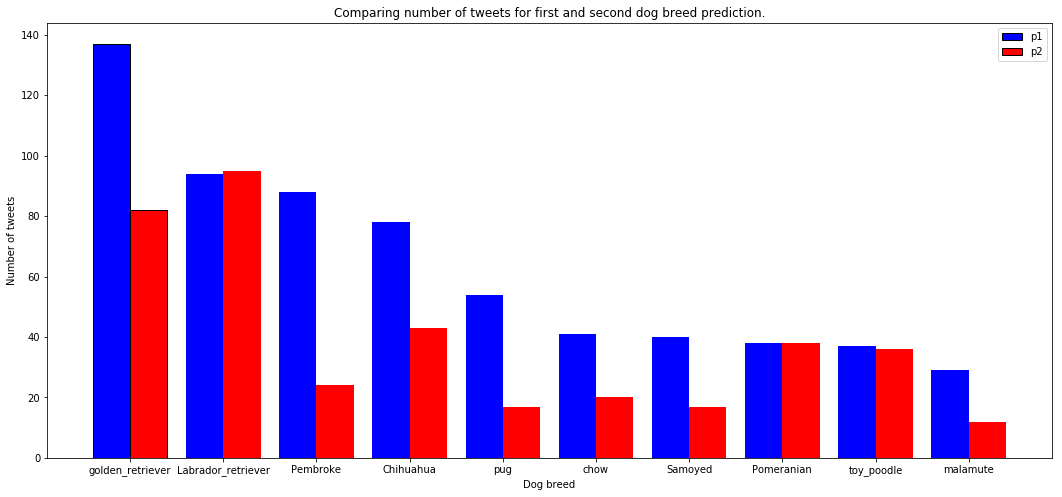

In [520]:
# Create a bar chart to show the comparison of p1 and p2 dog breed predictions
nr_options = len(df_p1_p2.index[:10])
s1 = df_p1_p2.p1.values[:10]
s2 = df_p1_p2.p2.values[:10]
labels = df_p1_p2.index[:10]
x_label = "Dog breed"
y_label = "Number of tweets"
title = "Comparing number of tweets for first and second dog breed prediction."

# Set figure size
fig, ax = plt.subplots(figsize =(18, 8))

# Set x-axis locations
x_location = np.arange(nr_options)

# Set bars width
width = 0.4

# Create bar chart
ax.bar(x_location, s1, color='b', width=width, edgecolor='black', label="p1")
ax.bar(x_location + width, s2, color='r', width=width, edgecolor='black', label="p2")

plt.xticks(x_location + width/2, labels)

# Add title, x and y label
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Add legend
plt.legend();

From the above chart we see that golden retriever is the predicted most popular dog breed.